In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('train.csv')
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [4]:
bank.columns


Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
bank.dtypes

id                  int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
bank_client = bank.iloc[: , 1:8]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,56,services,married,high.school,no,no,yes
4,45,services,married,basic.9y,unknown,no,no


In [7]:
bank_client = bank.iloc[: , 1:8]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,56,services,married,high.school,no,no,yes
4,45,services,married,basic.9y,unknown,no,no


In [8]:
bank_related = bank.iloc[: , 8:12]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,307
4,telephone,may,mon,198


In [9]:
print('Marital:\n', bank_client['marital'].unique())
print('\nEducation:\n', bank_client['education'].unique())
print('\nDefault:\n', bank_client['default'].unique())
print('\nHousing:\n', bank_client['housing'].unique())
print('\nJob:\n', bank_client['job'].unique())
print("Contact? : \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']

Education:
 ['basic.4y' 'high.school' 'basic.9y' 'unknown' 'professional.course'
 'basic.6y' 'university.degree' 'illiterate']

Default:
 ['no' 'unknown' 'yes']

Housing:
 ['no' 'yes' 'unknown']

Job:
 ['housemaid' 'services' 'blue-collar' 'technician' 'retired' 'management'
 'self-employed' 'admin.' 'unknown' 'entrepreneur' 'unemployed' 'student']
Contact? : 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


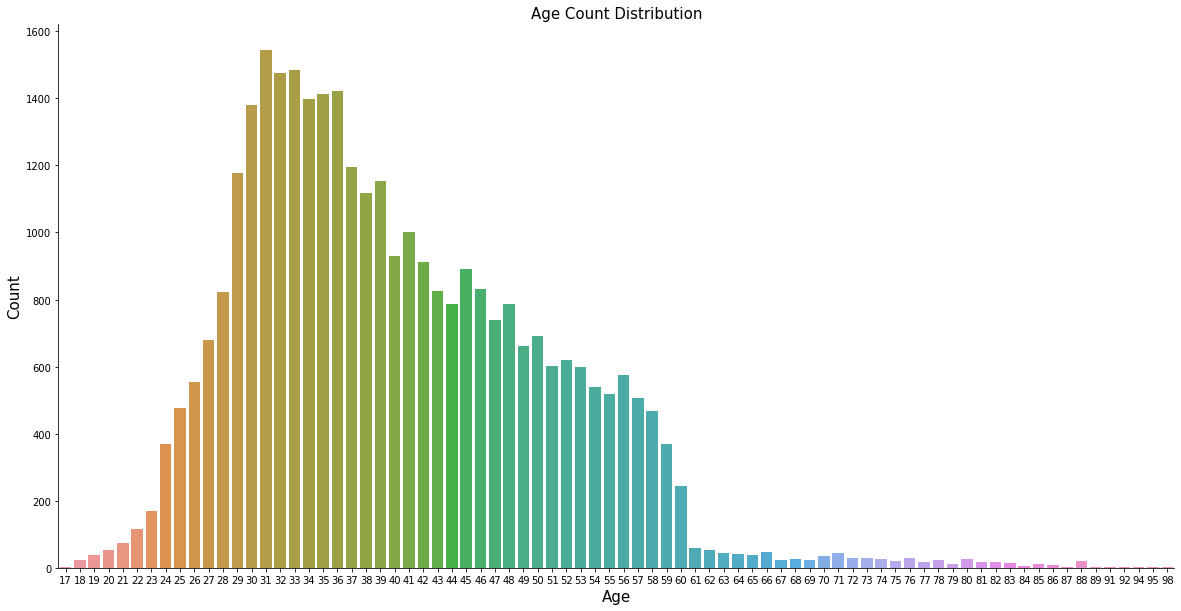

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [11]:
print('1 deg Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_client['age'].quantile(q = 1.00))
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  32.0
2 deg Quartile:  38.0
3 deg Quartile:  47.0
4 deg Quartile:  98.0
Ages above:  69.5 are outliers


In [12]:
print('Outliers (above the age of 69.6): ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Total clients: ', len(bank_client))
print('Outlier %:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Outliers (above the age of 69.6):  391
Total clients:  32978
Outlier %: 1.19 %


In [13]:
print('MEAN:', round(bank_client['age'].mean(), 1))
print('STD :', round(bank_client['age'].std(), 1))
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), )

MEAN: 40.0
STD : 10.5
CV  : 26.1


Coefficient of variation is on the higher side. So, we can conclude that age  is not giving us much info.

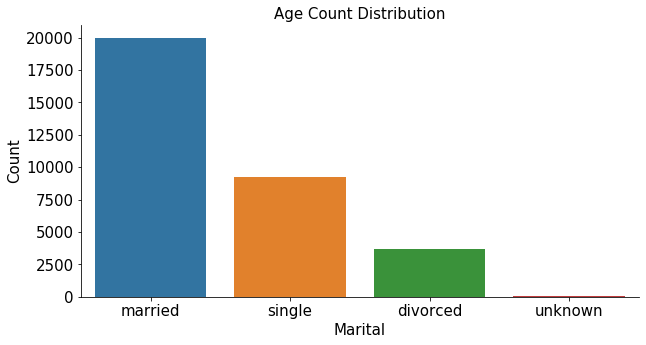

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

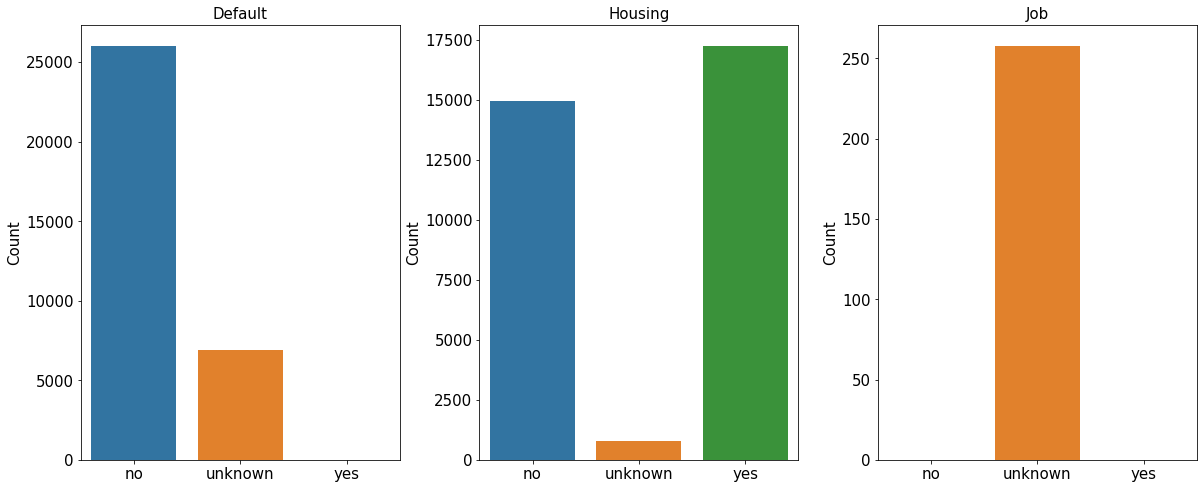

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'job', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Job', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

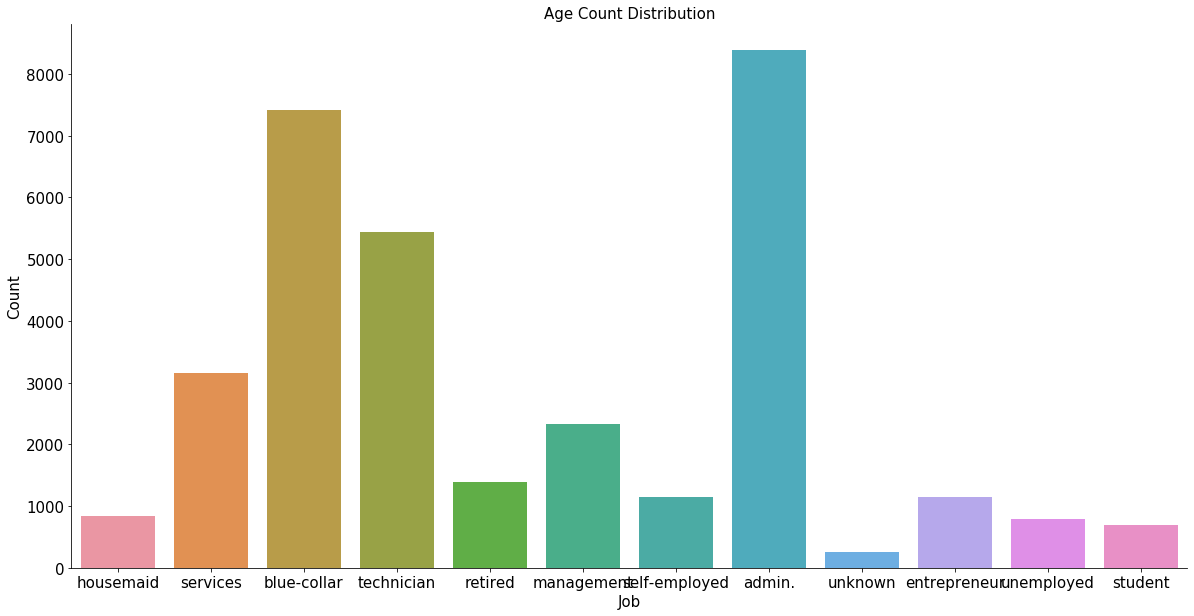

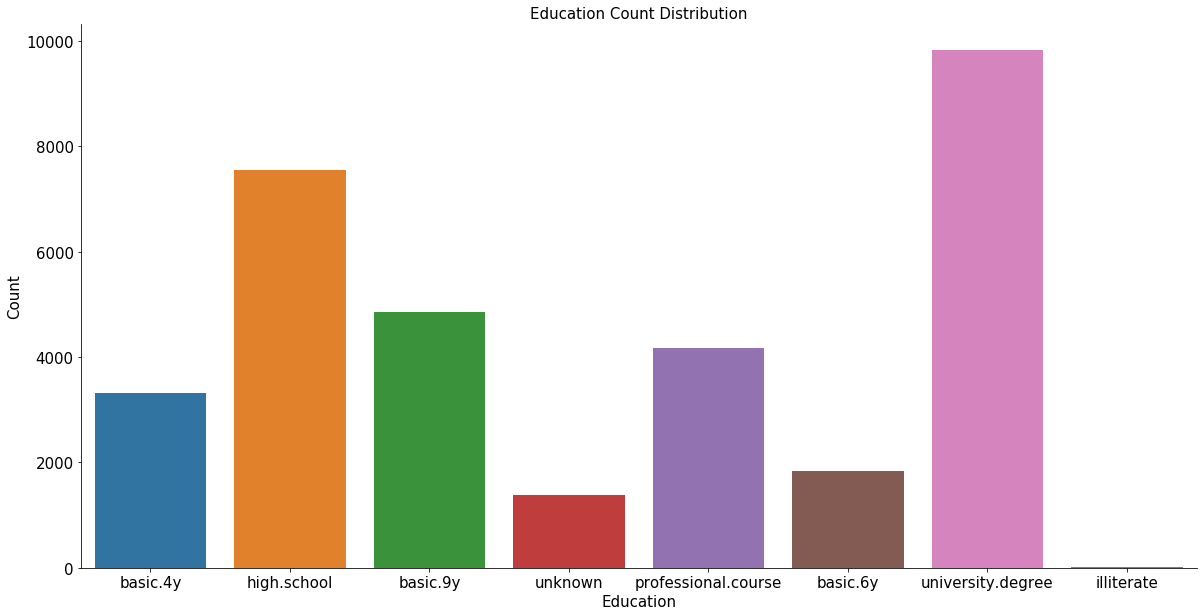

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

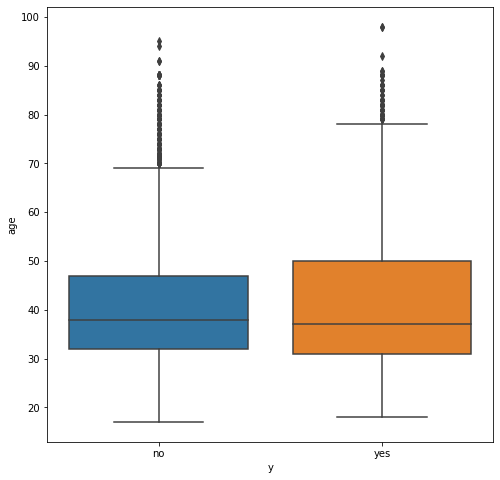

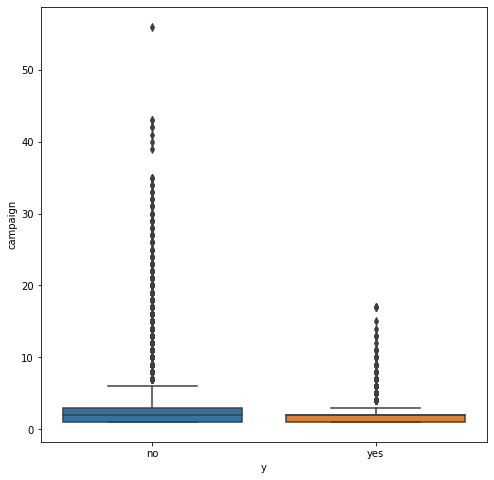

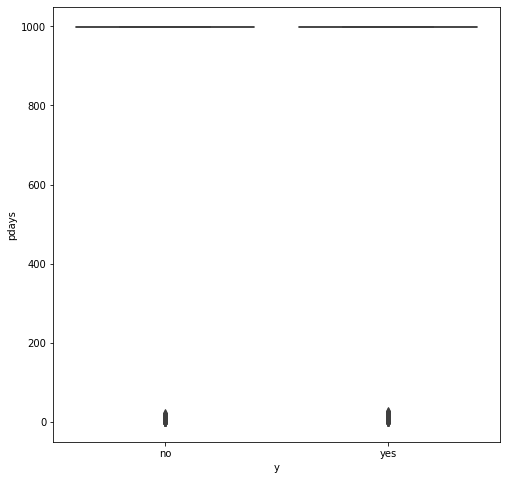

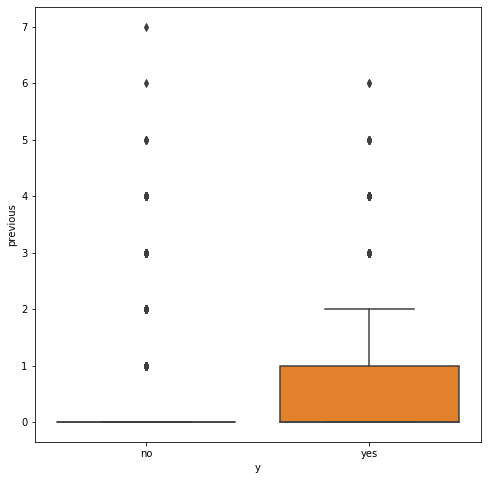

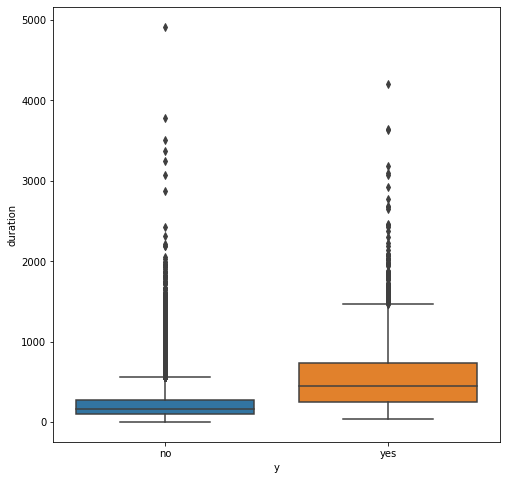

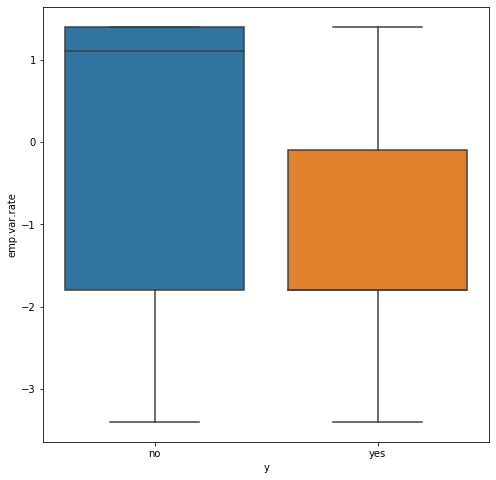

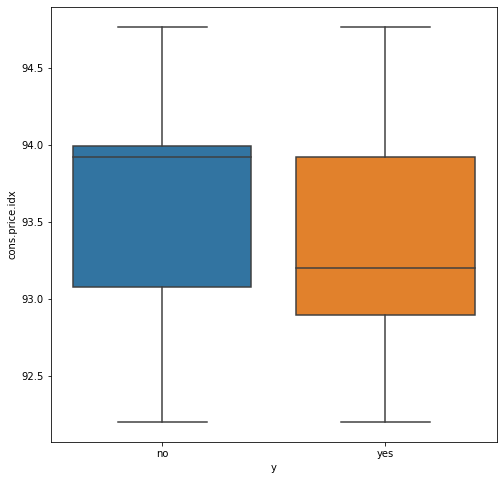

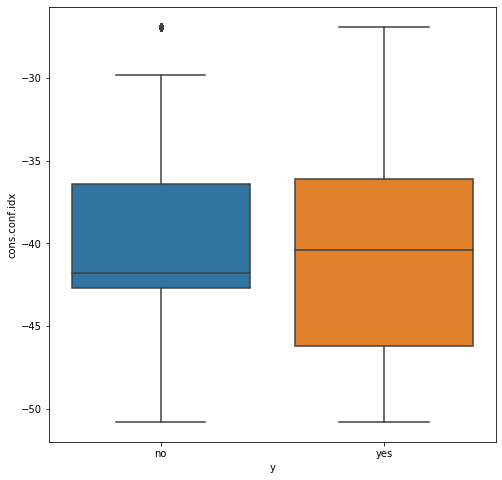

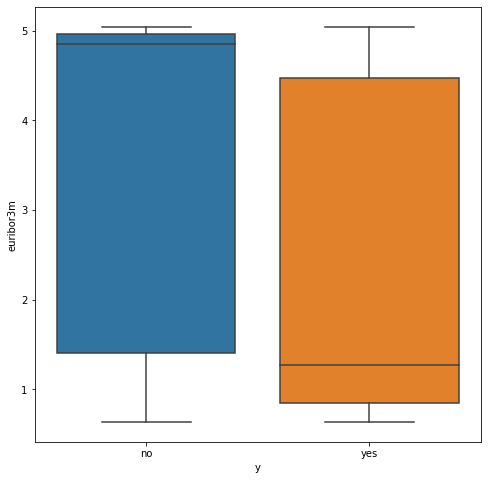

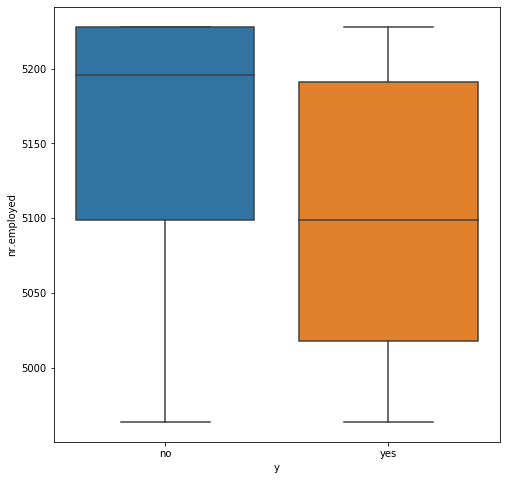

In [17]:
numeric_vars=["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_vars=[i for i in bank.columns if i not in numeric_vars]
categorical_vars.remove("y")
target="y"

for i in numeric_vars:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=target,y=i,data=bank)
    plt.show()

age


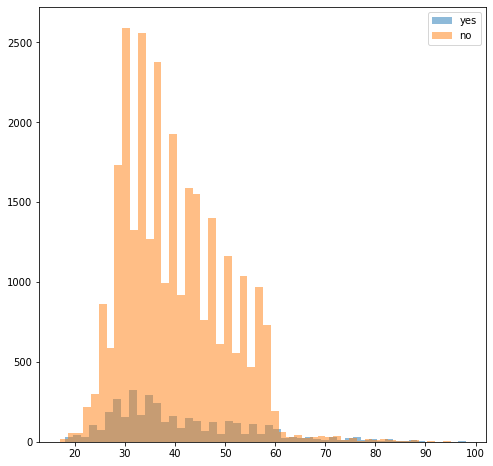

campaign


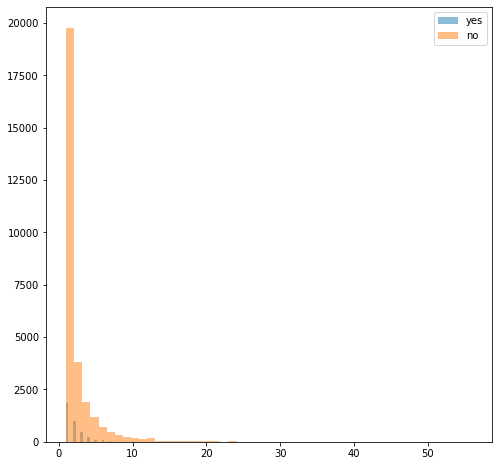

pdays


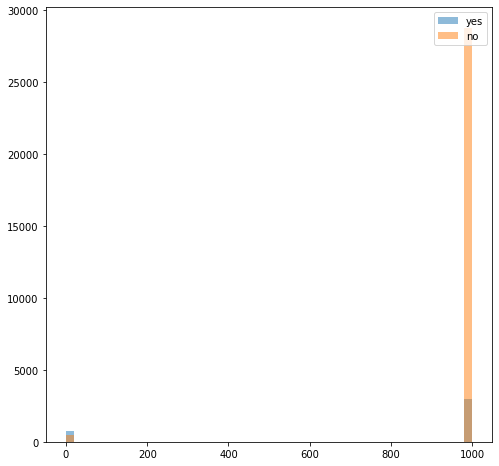

previous


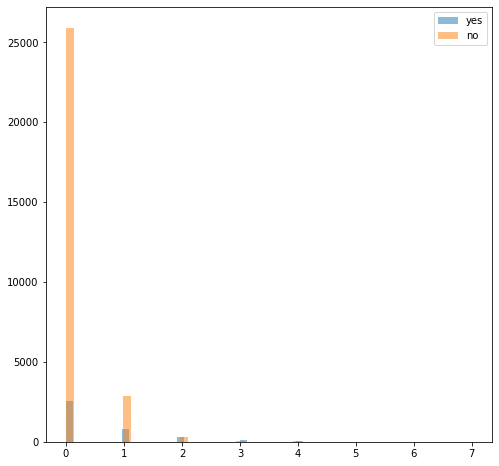

duration


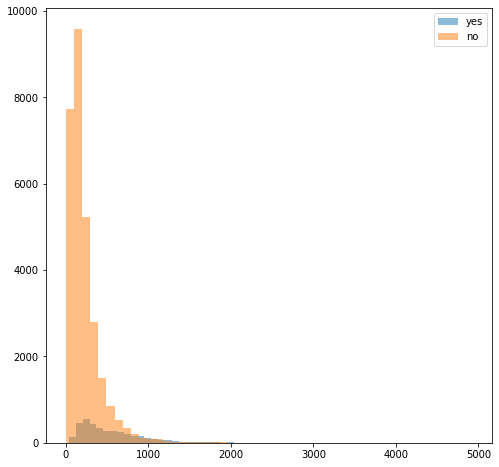

emp.var.rate


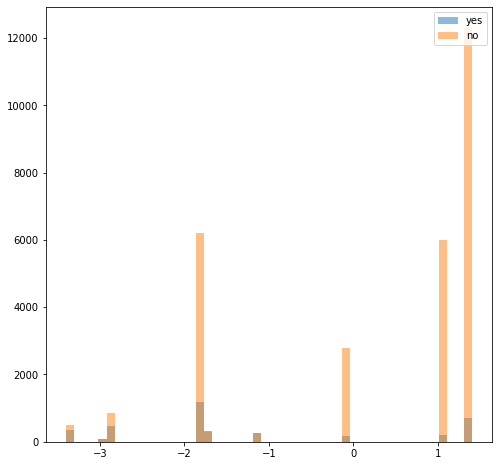

cons.price.idx


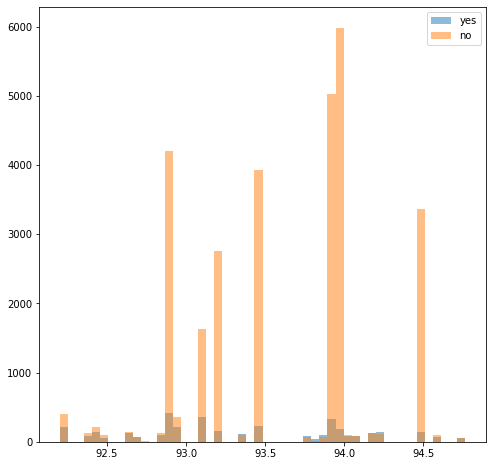

cons.conf.idx


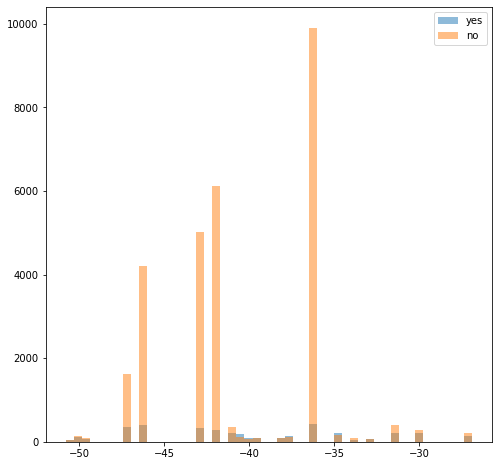

euribor3m


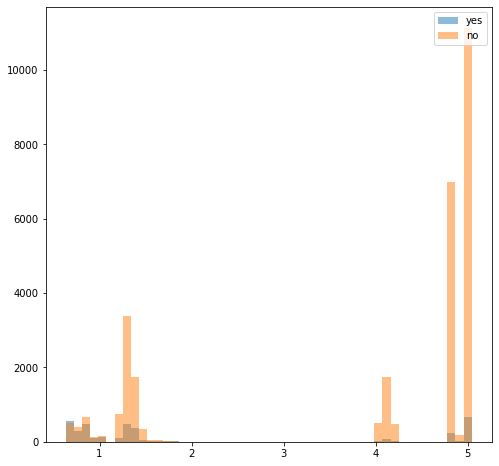

nr.employed


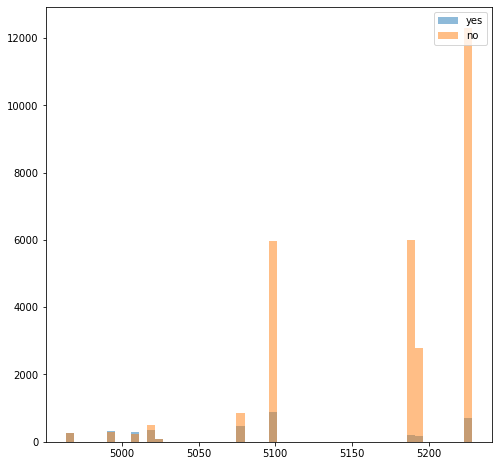

In [18]:
from matplotlib import pyplot
bins=50
for i in numeric_vars:
    plt.figure(figsize=(8,8))
    pyplot.hist(bank[bank["y"]=="yes"][i].values, bins, alpha=0.5, label='yes', )
    pyplot.hist(bank[bank["y"]=="no"][i].values, bins, alpha=0.5, label='no')
    pyplot.legend(loc='upper right')
    print(i)
    pyplot.show()

The categorical histogram plots show that the the distribution are similar or different here we see that age and emp.varrate have same categorical plots and The categorical histograms show distribution. The pdays attribute can be removed as it has all the variables with nearly same attribute value..


In [19]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

print('\nHousing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

print('\nHousing:\n No to personal loan:'     , bank_client[bank_client['job'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['job'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['job'] == 'yes']    ['age'].count())

Default:
 No credit in default: 26043 
 Unknown credit in default: 6932 
 Yes to credit in default: 3

Housing:
 No housing in loan: 14937 
 Unknown housing in loan: 789 
 Yes to housing in loan: 17252

Housing:
 No to personal loan: 0 
 Unknown to personal loan: 258 
 Yes to personal loan: 0


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['job']     = labelencoder_X.fit_transform(bank_client['job'])

In [21]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [25]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,no
1,3,7,1,3,1,0,no
2,2,7,1,3,0,2,no
3,3,7,1,3,0,0,yes
4,2,7,1,2,1,0,no


In [22]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [23]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [24]:
print('1 deg Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_related['duration'].quantile(q = 1.00))
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) +  1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  103.0
2 deg Quartile:  180.0
3 deg Quartile:  320.0
4 deg Quartile:  4918.0
Duration calls above:  645.5 are outliers


In [25]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2405
Number of clients:  32978
Outliers are: 7.29 %


In [26]:
bank[(bank['duration'] == 0)]

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4967,6251,39,admin.,married,high.school,no,yes,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
18413,23031,59,management,married,university.degree,no,yes,no,cellular,aug,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
22455,28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
26435,33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


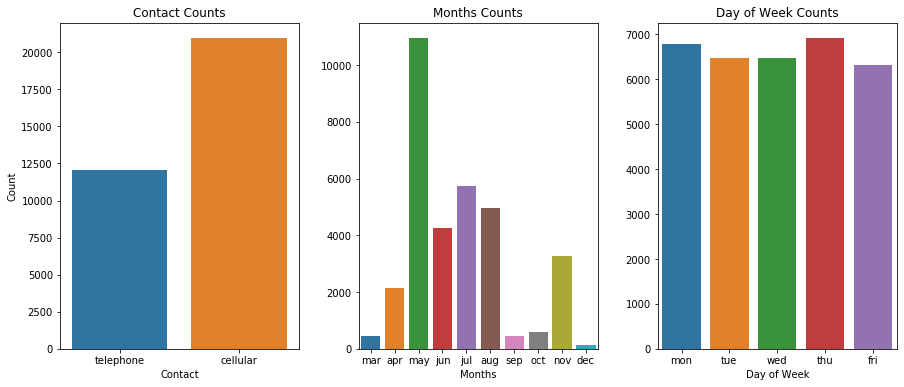

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [28]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  645.5 are outliers


In [29]:
bank_related[bank_related['duration'] > 640].count()

contact        2446
month          2446
day_of_week    2446
duration       2446
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,307
4,1,6,1,198


In [31]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [32]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]

In [33]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [34]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [35]:
bank_client=bank.iloc[: , 1:8]

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [36]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(32978, 20)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [38]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
19101,2,1,1,2,0,2,0,0,1,0,2,1.4,93.444,-36.1,4.963,5228.1,2,999,0,1
20734,2,7,1,3,0,2,0,1,7,4,1,-0.1,93.200,-42.0,4.120,5195.8,2,999,0,1
17620,3,0,1,3,0,0,2,0,1,4,3,1.4,93.444,-36.1,4.964,5228.1,3,999,0,1
30675,4,5,1,2,0,0,0,0,8,0,2,-3.4,92.431,-26.9,0.739,5017.5,2,999,0,1
10487,3,1,1,0,1,2,0,0,3,4,3,1.4,93.918,-42.7,4.962,5228.1,2,999,0,1


In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[5537  134]
 [ 459  276]]
91.0


k=1 87.79 (+/- 0.59)
k=2 89.47 (+/- 0.52)
k=3 89.28 (+/- 0.48)
k=4 89.65 (+/- 0.50)
k=5 89.71 (+/- 0.34)
k=6 89.83 (+/- 0.57)
k=7 89.84 (+/- 0.45)
k=8 89.97 (+/- 0.42)
k=9 89.92 (+/- 0.43)
k=10 90.02 (+/- 0.49)
k=11 90.05 (+/- 0.42)
k=12 90.17 (+/- 0.42)
k=13 90.16 (+/- 0.49)
k=14 90.02 (+/- 0.33)
k=15 90.04 (+/- 0.42)
k=16 90.07 (+/- 0.37)
k=17 90.09 (+/- 0.38)
k=18 90.03 (+/- 0.37)
k=19 90.10 (+/- 0.39)
k=20 90.07 (+/- 0.45)
k=21 90.11 (+/- 0.37)
k=22 90.07 (+/- 0.33)
k=23 90.14 (+/- 0.38)
k=24 90.08 (+/- 0.48)
k=25 90.13 (+/- 0.45)
k=26 90.05 (+/- 0.44)
k=27 90.12 (+/- 0.41)
k=28 90.06 (+/- 0.41)
k=29 90.11 (+/- 0.42)
k=30 90.01 (+/- 0.35)
The optimal number of neighbors is 11 with 90.2%


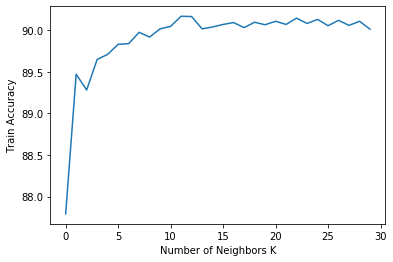

In [40]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)
neighbors = np.arange(0,30)
cv_scores = []
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5571  100]
 [ 533  202]]
90.0


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5460  211]
 [ 367  368]]
91.0


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5494  177]
 [ 371  364]]
91.0


In [44]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5019  652]
 [ 311  424]]
85.0


In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5306  365]
 [ 348  387]]
89.0


In [46]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)


,Models,Score
5,Gradient Boosting,0.911561
0,Random Forest Classifier,0.908212
3,Logistic Model,0.906179
2,K-Near Neighbors,0.900835
1,Decision Tree Classifier,0.881981
4,Gausian NB,0.843180


In [47]:
from sklearn import metrics
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

<Figure size 432x288 with 0 Axes>

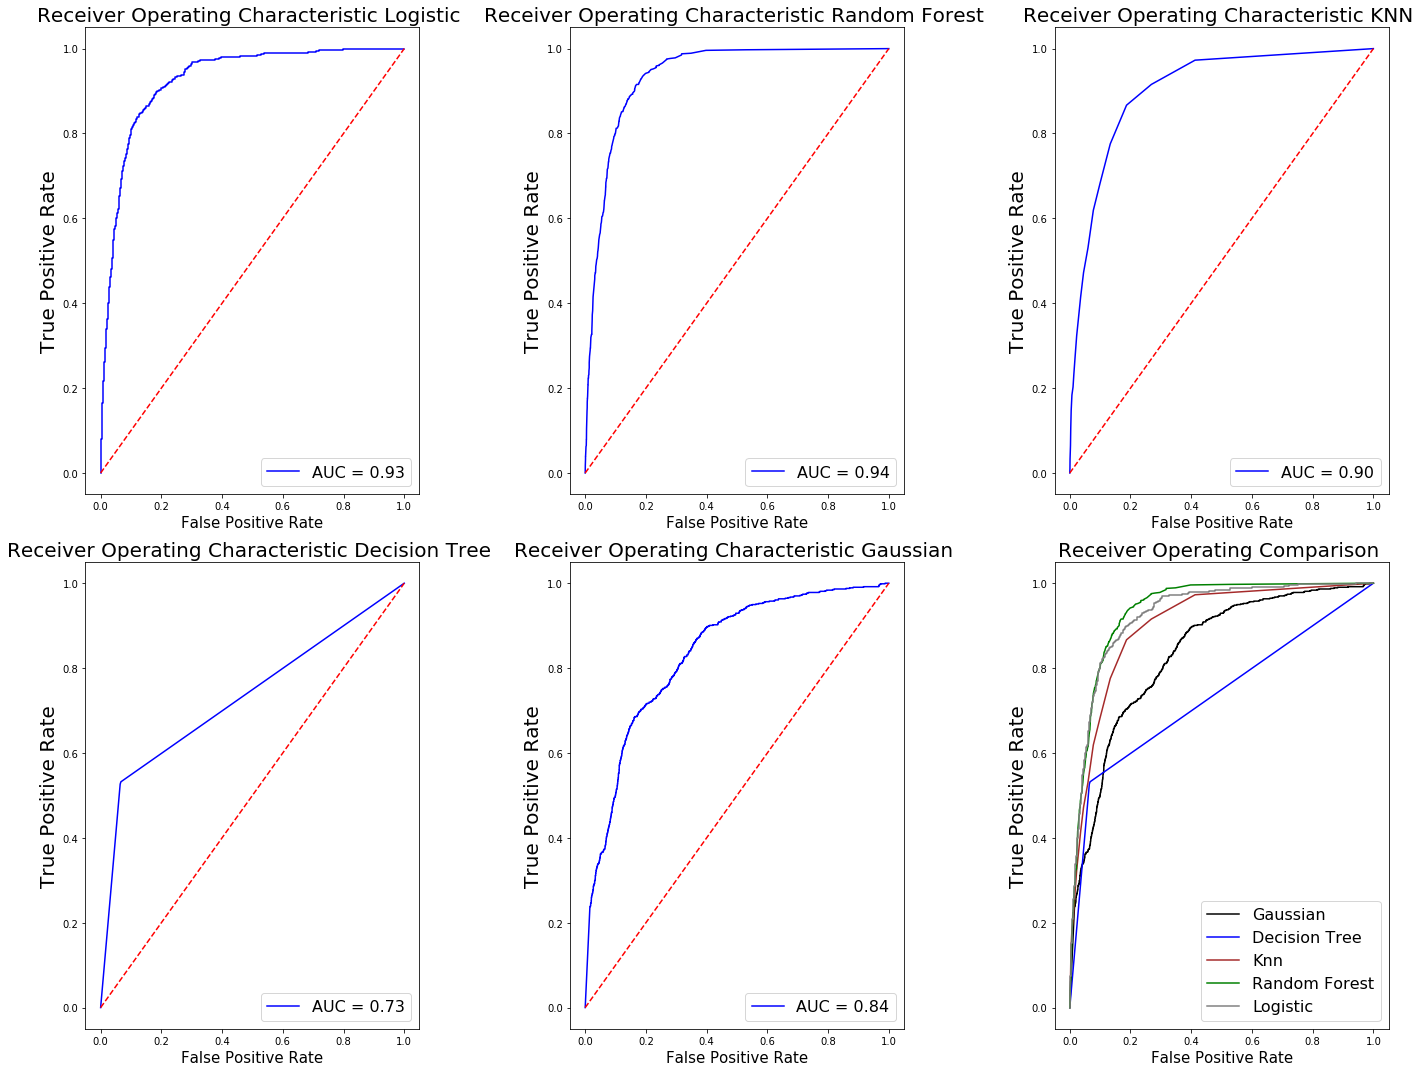

In [49]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [50]:
from sklearn.metrics import classification_report
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Confusion Matrix
 [[5571  100]
 [ 533  202]]
KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      5671
           1       0.67      0.27      0.39       735

    accuracy                           0.90      6406
   macro avg       0.79      0.63      0.67      6406
weighted avg       0.88      0.90      0.88      6406



In [51]:
print(round(7163 /(7163 + 116),2))
print(round(253 / (253 + 706  ),2))
print(round(metrics.recall_score(y_test, knnpred),2))

0.98
0.26
0.27


In [52]:
print(round(253 / (253 + 116),2))
print(round(metrics.precision_score(y_test, knnpred),2))

0.69
0.67


In [53]:
F1_0 = 2*0.91*0.98/(0.91+0.98)
round(F1_0,2)
F1_1 = 2*0.69*0.26/(0.69+0.26)
round(F1_1,2)
AVG_precision =  (0.91*(7279/8238))+ (0.69*(959/8238))
round(AVG_precision,2)
AVG_Recall =  (0.98*(7279/8238))+ (0.26*(959/8238))
round(AVG_Recall,2)
AVG_f1 =  (0.95*(7279/8238))+ (0.38*(959/8238))
round(AVG_f1,2)

0.88

In [54]:
test = pd.read_csv('test.csv')
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [55]:
test.info()
test.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 21 columns):
id                8210 non-null int64
age               8210 non-null int64
job               8210 non-null object
marital           8210 non-null object
education         8210 non-null object
default           8210 non-null object
housing           8210 non-null object
loan              8210 non-null object
contact           8210 non-null object
month             8210 non-null object
day_of_week       8210 non-null object
duration          8210 non-null int64
campaign          8210 non-null int64
pdays             8210 non-null int64
previous          8210 non-null int64
poutcome          8210 non-null object
emp.var.rate      8210 non-null float64
cons.price.idx    8210 non-null float64
cons.conf.idx     8210 non-null float64
euribor3m         8210 non-null float64
nr.employed       8210 non-null float64
dtypes: float64(5), int64(6), object(10)
memory usage: 1.3+ MB


Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [56]:
bank_client = test.iloc[: , 1:8]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,40,admin.,married,basic.6y,no,no,no
1,59,admin.,married,professional.course,no,no,no
2,41,blue-collar,married,unknown,unknown,no,no
3,25,services,single,high.school,no,yes,no
4,57,housemaid,divorced,basic.4y,no,yes,no


In [57]:
print('Marital:\n', bank_client['marital'].unique())
print('\nEducation:\n', bank_client['education'].unique())
print('\nDefault:\n', bank_client['default'].unique())
print('\nHousing:\n', bank_client['housing'].unique())
print('\nJob:\n', bank_client['job'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']

Education:
 ['basic.6y' 'professional.course' 'unknown' 'high.school' 'basic.4y'
 'university.degree' 'basic.9y' 'illiterate']

Default:
 ['no' 'unknown']

Housing:
 ['no' 'yes' 'unknown']

Job:
 ['admin.' 'blue-collar' 'services' 'housemaid' 'unemployed' 'technician'
 'unknown' 'management' 'entrepreneur' 'self-employed' 'retired' 'student']


In [58]:
print(bank_client['age'].isnull().any())

False


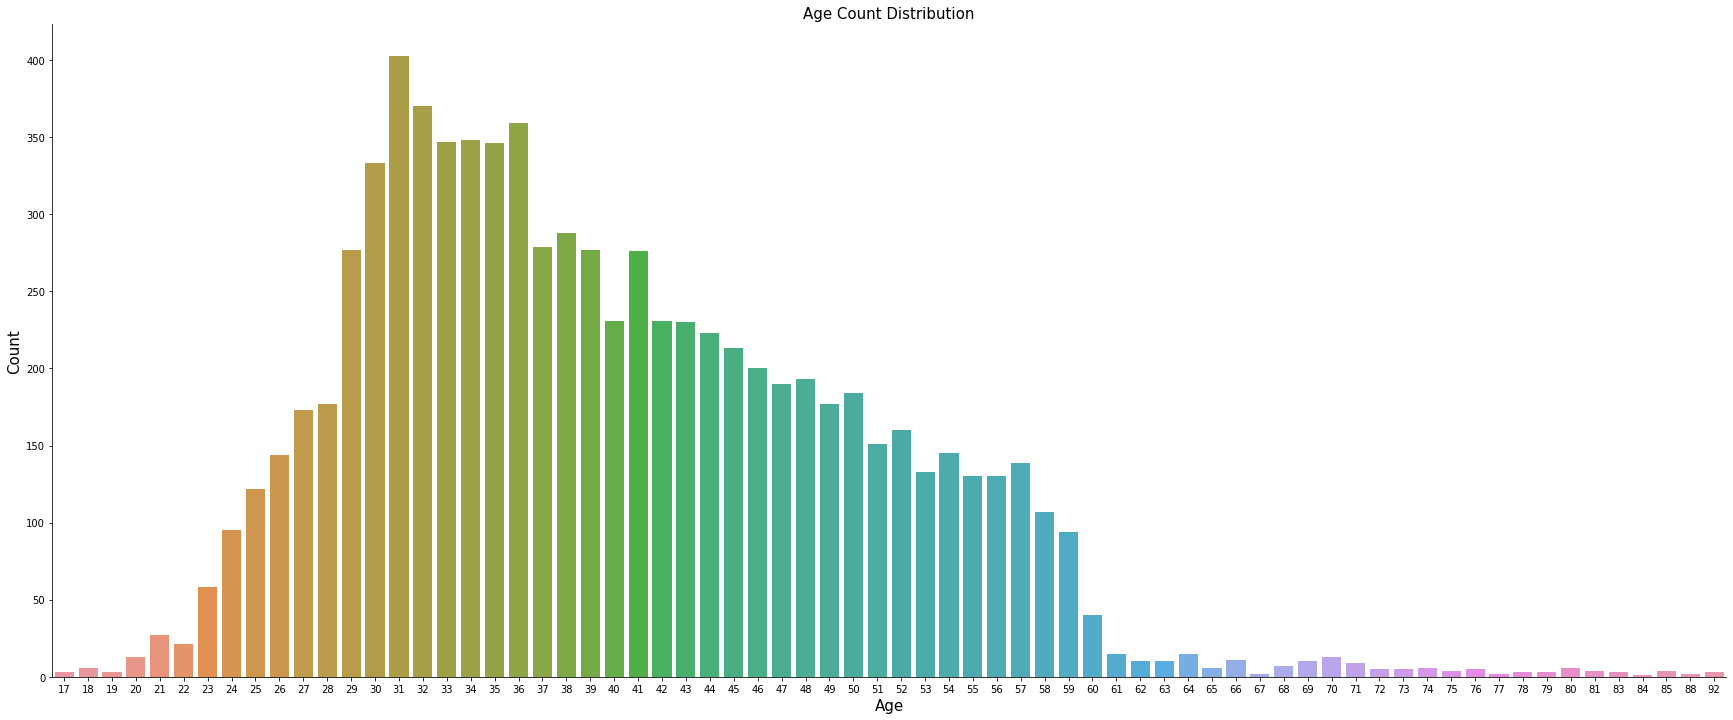

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [60]:
print('1 deg Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_client['age'].quantile(q = 1.00))
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  32.0
2 deg Quartile:  38.0
3 deg Quartile:  47.0
4 deg Quartile:  92.0
Ages above:  69.5 are outliers


In [61]:
print('Number of outliers (above the age of 69.6): ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Total Number of clients: ', len(bank_client))
print('Outlier Perecentage:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Number of outliers (above the age of 69.6):  78
Total Number of clients:  8210
Outlier Perecentage: 0.95 %


In [62]:
print('MEAN:', round(bank_client['age'].mean(), 1))
print('STD :', round(bank_client['age'].std(), 1))
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), )

MEAN: 40.0
STD : 10.2
CV  : 25.6


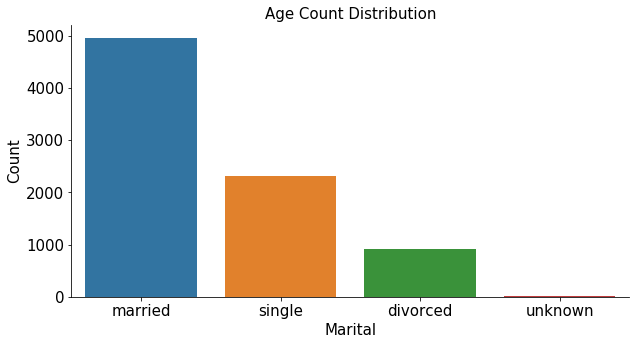

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

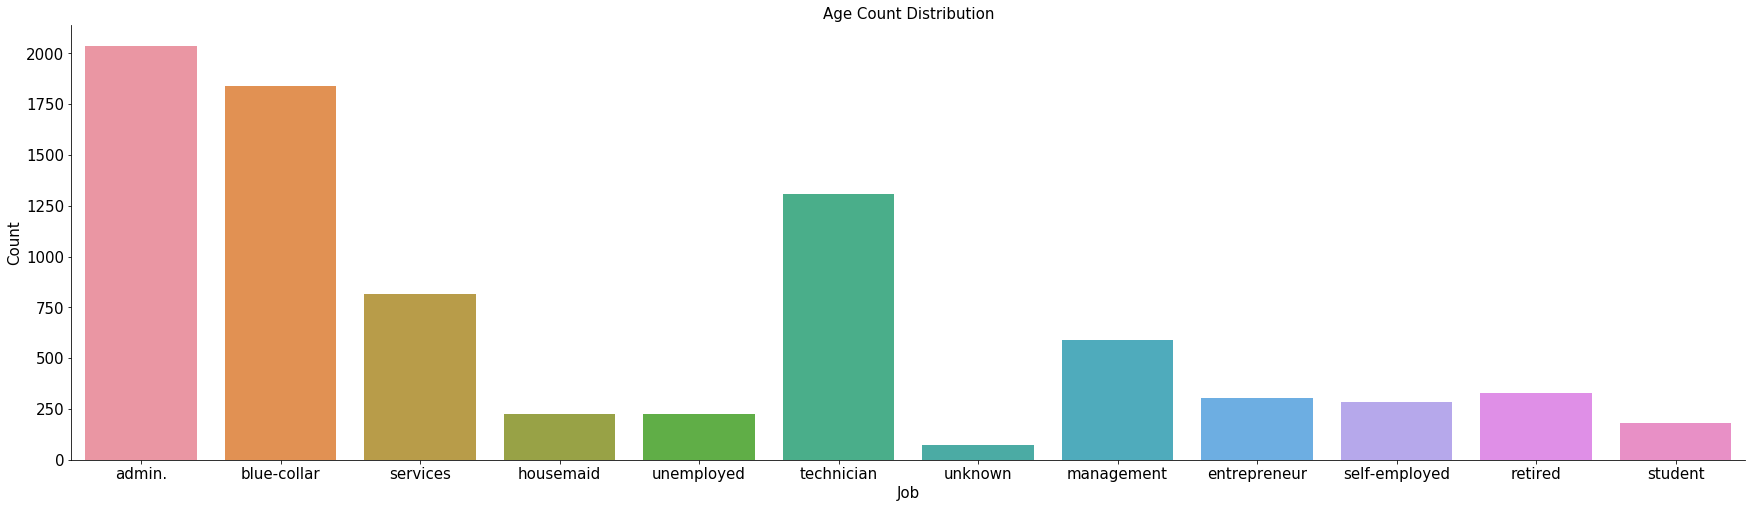

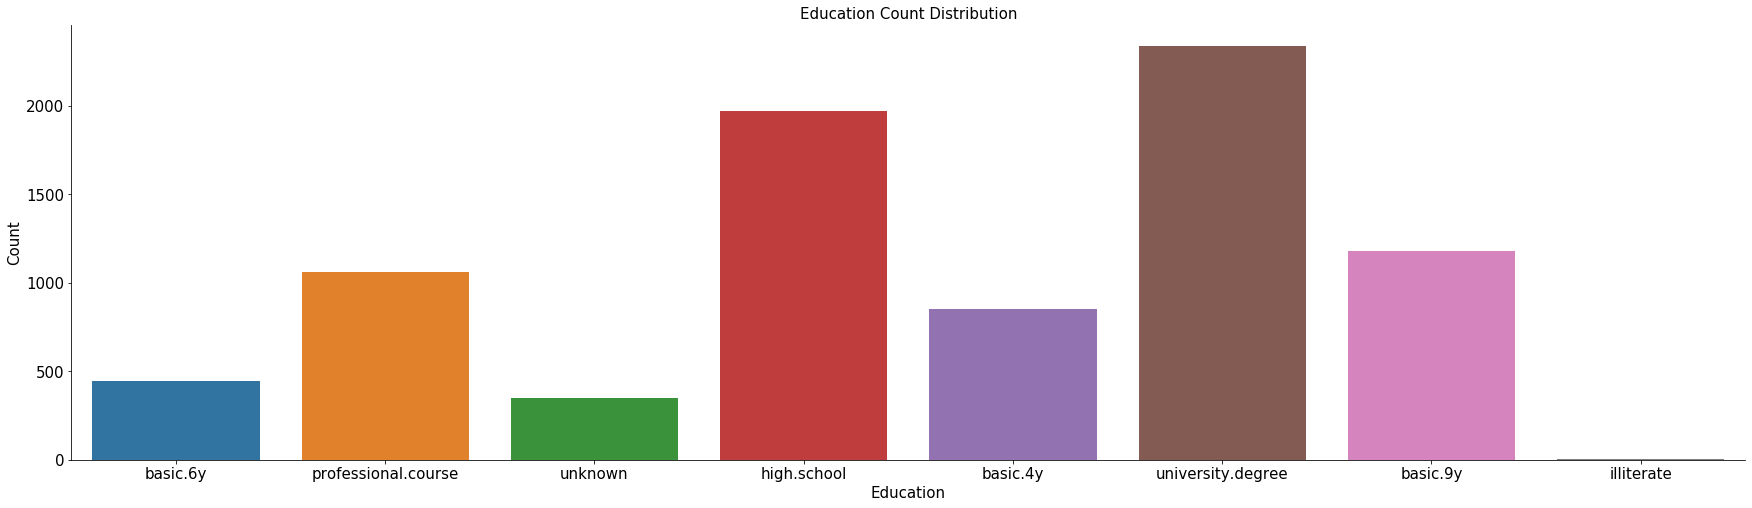

In [64]:

fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


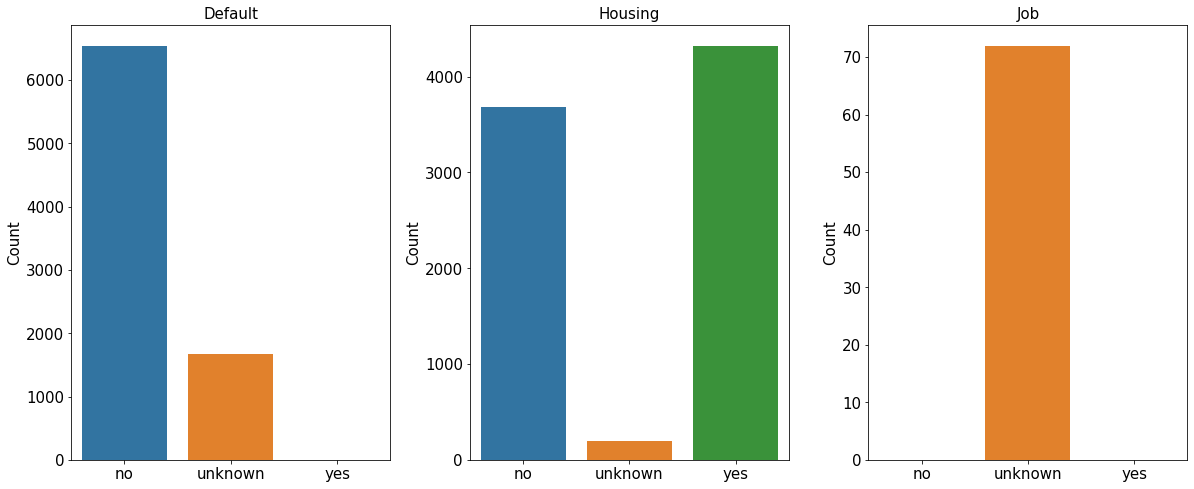

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'job', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Job', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [66]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

print('\nHousing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

print('\nHousing:\n No to personal loan:'     , bank_client[bank_client['job'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['job'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['job'] == 'yes']    ['age'].count())


Default:
 No credit in default: 6545 
 Unknown credit in default: 1665 
 Yes to credit in default: 0

Housing:
 No housing in loan: 3685 
 Unknown housing in loan: 201 
 Yes to housing in loan: 4324

Housing:
 No to personal loan: 0 
 Unknown to personal loan: 72 
 Yes to personal loan: 0


In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['job']     = labelencoder_X.fit_transform(bank_client['job'])

In [68]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [69]:
# Dividing the dataframe into smaller chunks to make analysis easier
bank_related = test.iloc[: , 8:12]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,151
1,telephone,may,mon,139
2,telephone,may,mon,55
3,telephone,may,mon,222
4,telephone,may,mon,293


In [70]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [71]:
print("Contact? : \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Contact? : 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


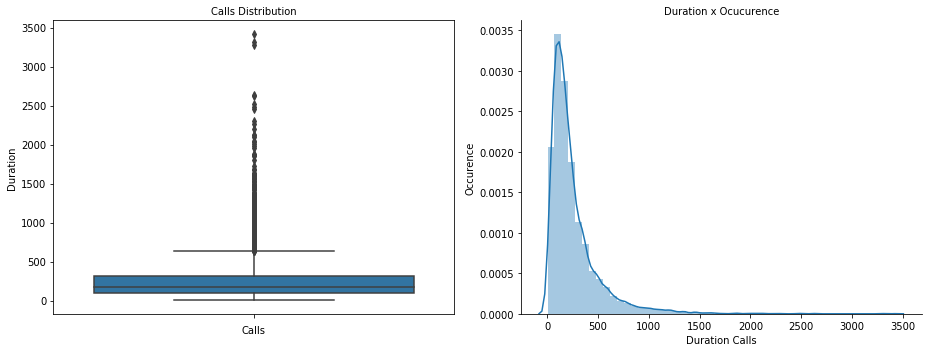

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [73]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean
print('1 deg Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Max duration  call in minutes:   57.0
Min duration  call in minutes:    0.1
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3
1 deg Quartile:  102.0
2 deg Quartile:  179.0
3 deg Quartile:  317.0
4 deg Quartile:  3422.0
Duration calls above:  639.5 are outliers


In [74]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  558
Number of clients:  8210
Outliers are: 6.8 %


In [75]:
test[(test['duration'] == 0)]

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed


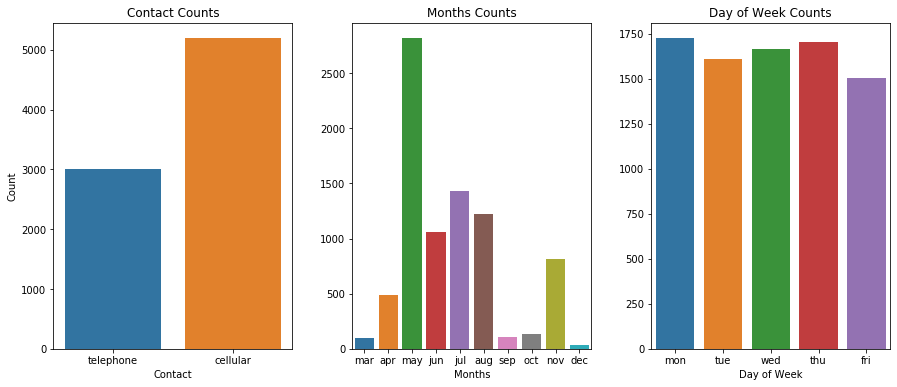

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [77]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  639.5 are outliers


In [78]:
bank_related[bank_related['duration'] > 640].count()

contact        562
month          562
day_of_week    562
duration       562
dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [80]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [81]:
bank_se = test.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [82]:
bank_o = test.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [83]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [84]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [85]:
bank_client=test.iloc[: , 1:8]

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [86]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(8210, 20)